In [1]:
import sys
sys.path.append('..')
from common.time_layers import *
import pickle

In [2]:
class Rnnlm:
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs
    
    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.lstm_layer.reset_state()
        
    def save_params(self, file_name='Rnnlm.pkl'):
        with open(file_name, 'wb') as f:
            pickle.dump(self.params, f)
            
    def load_params(self, file_name='Rnnlm.pkl'):
        with open(file_name, 'rb') as f:
            self.params = pickle.load(f)

In [3]:
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm

In [4]:
batch_size = 20
wordvec_size = 100
hidden_size = 100
time_size = 35
lr = 20.0
max_epoch = 4
max_grad = 0.25

In [5]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

Done


In [6]:
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 10000.91
| 에폭 1 |  반복 21 / 1327 | 시간 4[s] | 퍼플렉서티 2581.88
| 에폭 1 |  반복 41 / 1327 | 시간 9[s] | 퍼플렉서티 1223.27
| 에폭 1 |  반복 61 / 1327 | 시간 14[s] | 퍼플렉서티 988.80
| 에폭 1 |  반복 81 / 1327 | 시간 19[s] | 퍼플렉서티 770.00
| 에폭 1 |  반복 101 / 1327 | 시간 24[s] | 퍼플렉서티 637.96
| 에폭 1 |  반복 121 / 1327 | 시간 30[s] | 퍼플렉서티 641.02
| 에폭 1 |  반복 141 / 1327 | 시간 37[s] | 퍼플렉서티 596.39
| 에폭 1 |  반복 161 / 1327 | 시간 43[s] | 퍼플렉서티 567.16
| 에폭 1 |  반복 181 / 1327 | 시간 49[s] | 퍼플렉서티 582.18
| 에폭 1 |  반복 201 / 1327 | 시간 55[s] | 퍼플렉서티 498.23
| 에폭 1 |  반복 221 / 1327 | 시간 61[s] | 퍼플렉서티 488.34
| 에폭 1 |  반복 241 / 1327 | 시간 67[s] | 퍼플렉서티 437.15
| 에폭 1 |  반복 261 / 1327 | 시간 73[s] | 퍼플렉서티 455.60
| 에폭 1 |  반복 281 / 1327 | 시간 78[s] | 퍼플렉서티 443.94
| 에폭 1 |  반복 301 / 1327 | 시간 84[s] | 퍼플렉서티 390.49
| 에폭 1 |  반복 321 / 1327 | 시간 90[s] | 퍼플렉서티 338.24
| 에폭 1 |  반복 341 / 1327 | 시간 96[s] | 퍼플렉서티 403.32
| 에폭 1 |  반복 361 / 1327 | 시간 102[s] | 퍼플렉서티 404.12
| 에폭 1 |  반복 381 / 1327 | 시간 108[s] | 퍼플렉서티 337.91
| 에

| 에폭 3 |  반복 541 / 1327 | 시간 925[s] | 퍼플렉서티 136.62
| 에폭 3 |  반복 561 / 1327 | 시간 931[s] | 퍼플렉서티 117.98
| 에폭 3 |  반복 581 / 1327 | 시간 937[s] | 퍼플렉서티 105.58
| 에폭 3 |  반복 601 / 1327 | 시간 942[s] | 퍼플렉서티 150.16
| 에폭 3 |  반복 621 / 1327 | 시간 948[s] | 퍼플렉서티 144.59
| 에폭 3 |  반복 641 / 1327 | 시간 954[s] | 퍼플렉서티 129.63
| 에폭 3 |  반복 661 / 1327 | 시간 960[s] | 퍼플렉서티 119.47
| 에폭 3 |  반복 681 / 1327 | 시간 965[s] | 퍼플렉서티 100.50
| 에폭 3 |  반복 701 / 1327 | 시간 971[s] | 퍼플렉서티 119.43
| 에폭 3 |  반복 721 / 1327 | 시간 977[s] | 퍼플렉서티 127.56
| 에폭 3 |  반복 741 / 1327 | 시간 985[s] | 퍼플렉서티 108.07
| 에폭 3 |  반복 761 / 1327 | 시간 992[s] | 퍼플렉서티 103.17
| 에폭 3 |  반복 781 / 1327 | 시간 998[s] | 퍼플렉서티 105.32
| 에폭 3 |  반복 801 / 1327 | 시간 1004[s] | 퍼플렉서티 115.65
| 에폭 3 |  반복 821 / 1327 | 시간 1009[s] | 퍼플렉서티 116.98
| 에폭 3 |  반복 841 / 1327 | 시간 1015[s] | 퍼플렉서티 114.42
| 에폭 3 |  반복 861 / 1327 | 시간 1021[s] | 퍼플렉서티 121.38
| 에폭 3 |  반복 881 / 1327 | 시간 1026[s] | 퍼플렉서티 106.87
| 에폭 3 |  반복 901 / 1327 | 시간 1032[s] | 퍼플렉서티 131.30
| 에폭 3 |  반복 921 / 1327 |

/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: Runtim

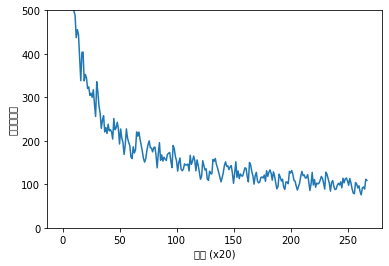

In [7]:
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval=20)
trainer.plot(ylim=(0, 500))

In [8]:
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('Test perplexity: ', ppl_test)

퍼플렉서티 평가 중 ...
234 / 235
Test perplexity:  136.17060935659126


In [9]:
model.save_params()